In [1]:
import pandas as pd

dfe = pd.read_csv('./data/generated/gen_emissions (1850-2022).csv')
dfe[dfe['Entity'] == 'World']

,Entity,Year,GHG,Total (CO₂),Coal (CO₂),Oil (CO₂),Gas (CO₂),Cement (CO₂),Flaring (CO₂),Other (CO₂),Per Capita (CO₂)
32005,World,1850,4.219061e+09,1.967520e+08,1.967520e+08,NaN,NaN,NaN,NaN,NaN,155821.0
32006,World,1851,4.409311e+09,1.986681e+08,1.986681e+08,NaN,NaN,NaN,NaN,NaN,156539.0
32007,World,1852,4.465078e+09,2.074142e+08,2.074142e+08,NaN,NaN,NaN,NaN,NaN,162602.0
32008,World,1853,4.532813e+09,2.171204e+08,2.171204e+08,NaN,NaN,NaN,NaN,NaN,169348.0
32009,World,1854,4.594584e+09,2.550332e+08,2.550332e+08,NaN,NaN,NaN,NaN,NaN,197911.0
...,...,...,...,...,...,...,...,...,...,...,...
32173,World,2018,5.242027e+10,3.676660e+10,1.472503e+10,1.226732e+10,7.498006e+09,1.565803e+09,407301862.0,303142150.0,4784956.0
32174,World,2019,5.279652e+10,3.703980e+10,1.468410e+10,1.237789e+10,7.621401e+09,1.615776e+09,435431524.0,305207416.0,4770127.0
32175,World,2020,5.079254e+10,3.504654e+10,1.422572e+10,1.093896e+10,7.555247e+09,1.633047e+09,398520302.0,295047904.0,4469679.0
32176,World,2021,5.293879e+10,3.685799e+10,1.498281e+10,1.155595e+10,7.922053e+09,1.692404e+09,403426985.0,301336295.0,4660085.0


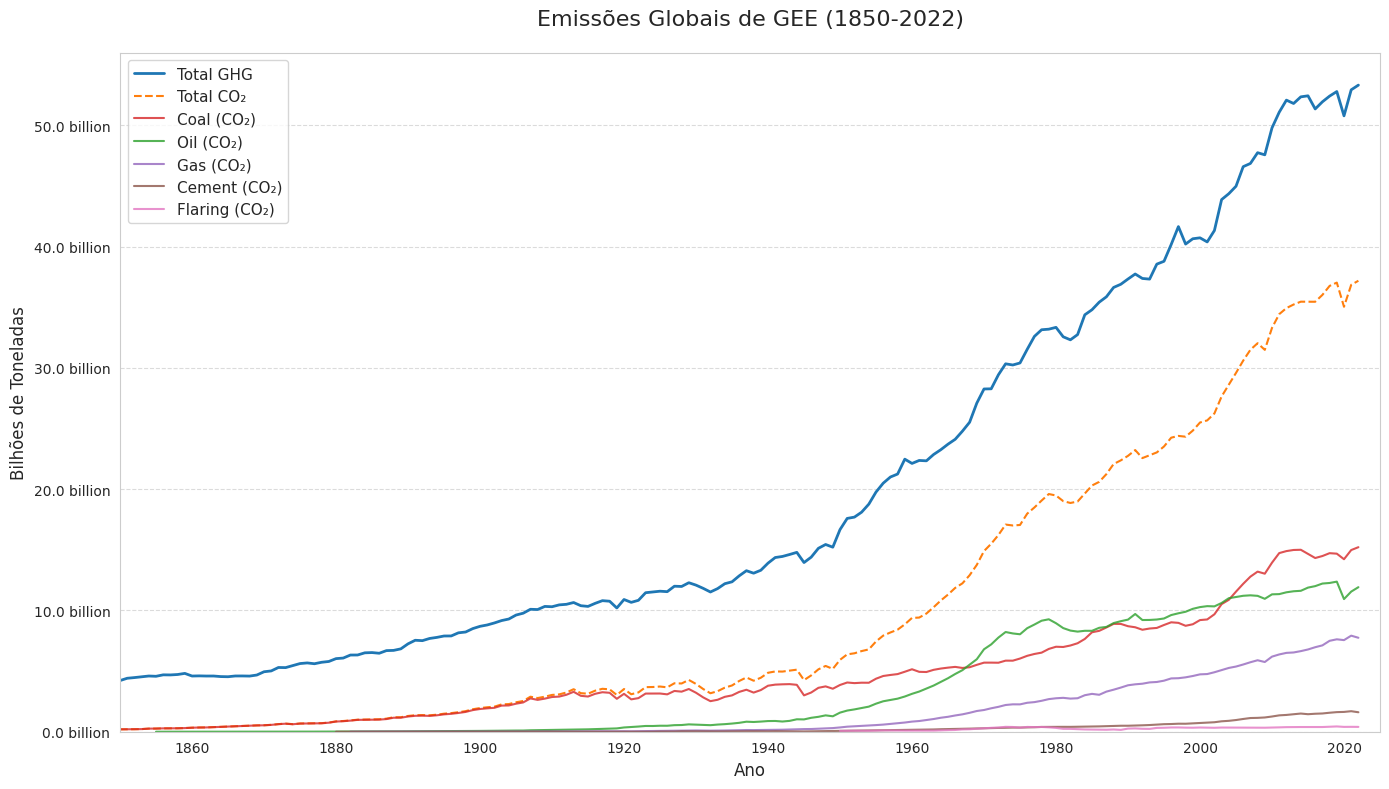

In [20]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns

def format_billions(value, pos):
    return f'{value/1e9:.1f} billion'

# Filtrar apenas dados globais (World)
dfwe = dfe[dfe['Entity'] == 'World'].copy()
dfwe = dfwe.sort_values('Year')

# Configurar estilo SEM grid vertical
sns.set_style("whitegrid", {'axes.grid': True, 'axes.grid.axis': 'y'})  # Grid apenas no eixo Y
plt.figure(figsize=(14, 8))

# Plotar GHG e Total CO₂
plt.plot(dfwe['Year'], dfwe['GHG'], label='Total GHG', color='#1f77b4', linewidth=2)
plt.plot(dfwe['Year'], dfwe['Total (CO₂)'], label='Total CO₂', color='#ff7f0e', linestyle='--', linewidth=1.5)

# Plotar fontes específicas de CO₂
co2_sources = ['Coal (CO₂)', 'Oil (CO₂)', 'Gas (CO₂)', 'Cement (CO₂)', 'Flaring (CO₂)']
cores = ['#d62728', '#2ca02c', '#9467bd', '#8c564b', '#e377c2']

for fonte, cor in zip(co2_sources, cores):
    plt.plot(dfwe['Year'], dfwe[fonte], label=fonte, color=cor, alpha=0.8)

# Configurações do gráfico
plt.title('Emissões Globais de GEE (1850-2022)', fontsize=16, pad=20)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Bilhões de Toneladas', fontsize=12)
plt.xlim(1850, 2025)
plt.ylim(bottom=0)
plt.legend(title_fontsize=12, fontsize=11)

# Configurar grid APENAS horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Somente linhas horizontais
plt.grid(axis='x', visible=False)
plt.gca().yaxis.set_major_formatter(format_billions)  # Formatação corrigida

plt.tight_layout()
plt.show()